In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [89]:
# import data ignoring the first row
df = pd.read_excel('/Users/yilewang/workspaces/data4project/mega_table.xlsx', sheet_name='hodgepodge_no_missing', skiprows=1)
X = df.iloc[:, 5:]


# extract cases group name are "SNC" and "AD"
Xo = df[df['group'].isin(['SNC', 'AD'])]
# count how many cases in each group
print(Xo['group'].value_counts())
X = Xo.iloc[:, 5:]
df.head()

AD     11
SNC    10
Name: group, dtype: int64


,number,group,caseid,M_sex_recode,M_Sex,M_W4_Age,M_W4_Education,Z_Attention,Z_Executive,Z_Language,...,wdc_HIP_R,wdc_PHG_L,wdc_PHG_R,wdc_AMY_L,wdc_AMY_R,wdc_sTEMp_L,wdc_sTEMp_R,wdc_mTEMp_L,wdc_mTEMp_R,wdc_average
0,1.0,SNC,2820A,0.0,Female,78.587269,9.0,1.29,0.66,1.04,...,124.32300,103.84853,134.8445,59.73196,35.80771,39.74140,50.59918,41.3377,80.1732,90.075536
1,2.0,SNC,3168A,0.0,Female,84.793977,6.0,-0.72,-0.30,-0.11,...,181.14100,127.94480,168.0533,76.11546,96.88896,60.16440,180.20210,97.6875,201.0259,114.193858
2,3.0,SNC,3358A,1.0,Male,93.869952,14.0,-0.46,1.62,1.50,...,97.67414,94.51230,113.1504,42.43014,63.60780,40.69170,66.24880,39.3636,115.5613,73.604142
3,4.0,SNC,3610A,0.0,Female,77.891855,14.0,1.90,1.07,1.07,...,81.19780,67.55110,95.6603,41.69030,39.98160,76.52960,68.48040,42.9908,70.6835,69.997263
4,5.0,SNC,4073A,0.0,Female,78.910335,11.0,0.04,0.00,0.69,...,94.63370,164.84140,111.8518,77.54690,52.54886,76.56341,106.85250,70.9745,99.5983,99.907296


In [90]:
df_trends = pd.read_excel('/Users/yilewang/workspaces/data4project/mega_table.xlsx', sheet_name='trends')
df_trends.head()

,Classes,variables,trends,num,type1,type2
0,demographic,M_W4_Age,nearly U shape,0,0,0
1,NaN,M_W4_Education,nearly U shape,1,0,0
2,cognitive_scores,Z_Attention,linear,2,0,0
3,NaN,Z_Executive,linear,3,0,0
4,NaN,Z_Language,linear,4,0,0


### Ignition over groups

         aCNG-R    aCNG-L    mCNG-R    mCNG-L    pCNG-R    pCNG-L     HIP-R  \
group                                                                         
AD     0.636831  0.635169  0.634752  0.634410  0.637969  0.633605  0.637263   
MCI    0.654210  0.654250  0.652852  0.656794  0.655742  0.659713  0.652770   
NC     0.661101  0.659658  0.661287  0.663369  0.666429  0.665708  0.663589   
SNC    0.667118  0.667752  0.661091  0.668546  0.669523  0.663211  0.665762   

          HIP-L     PHG-R     PHG-L     AMY-R     AMY-L   sTEMp-R   sTEMp-L  \
group                                                                         
AD     0.634857  0.636134  0.632188  0.633855  0.632522  0.632994  0.631063   
MCI    0.654093  0.652612  0.652892  0.654069  0.655794  0.655750  0.657336   
NC     0.659152  0.662076  0.661656  0.658868  0.660320  0.658042  0.661884   
SNC    0.666218  0.669226  0.665041  0.662141  0.666585  0.662443  0.661916   

        mTEMp-R   mTEMp-L  ignition_left  ignition

/var/folders/s2/p1qgp3rx7wz63mc5wkrqb7yw0000gp/T/ipykernel_69097/2237847184.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ig_mean = df_ig.groupby('group').mean()
/Users/yilewang/miniconda3/envs/tvbenv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


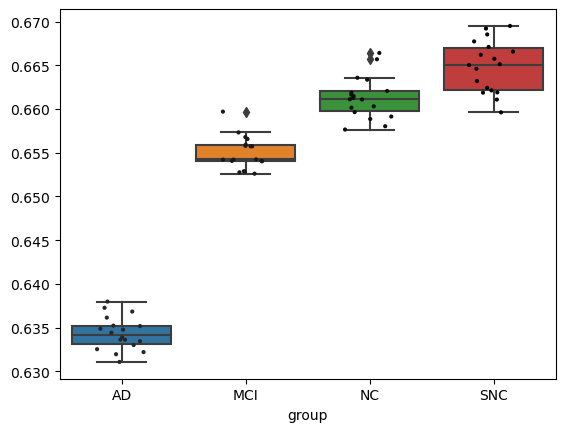

aCNG-R: 0.03028674605066628
aCNG-L: 0.03258277198653592
mCNG-R: 0.026339382061945638
mCNG-L: 0.034135924644387416
pCNG-R: 0.03155431457140356
pCNG-L: 0.029605810931614185
HIP-R: 0.028498718512229737
HIP-L: 0.031360235460077046
PHG-R: 0.033091821303332325
PHG-L: 0.03285338815232308
AMY-R: 0.028286553996944908
AMY-L: 0.034062861051754045
sTEMp-R: 0.02944899061639117
sTEMp-L: 0.030852749797950496
mTEMp-R: 0.027686474581290033
mTEMp-L: 0.028268555655203587


In [91]:
df_ig = pd.read_excel('/Users/yilewang/workspaces/data4project/mega_table.xlsx', sheet_name='Ignition')
# take mean of each group
df_ig_mean = df_ig.groupby('group').mean()
print(df_ig_mean)
sns.boxplot(data=df_ig_mean.T)
sns.stripplot(data=df_ig_mean.T, color='black', size=3, jitter=0.2)
plt.show()

for i in range(16):
    print(f"{df_ig_mean.columns[i]}: {df_ig_mean.iloc[3, i] - df_ig_mean.iloc[0, i]}")

### Individual metrics

In [92]:
# for column in df.columns:
#     if column not in ['number','group', 'caseid','M_sex_recode','M_Sex']:  # skip the group column
#         plt.figure(figsize=(5,5))
#         sns.violinplot(x='group', y=column, data=df)
#         sns.pointplot(x='group', y=column, data=df, color='red')
#         sns.stripplot(x='group', y=column, data=df, size=4,jitter=True, color='black')
#         plt.title(f'Distribution of {column} by Group')
#         plt.show()

In [93]:
# in df_trends, get the num value when linear column is "1"
linear_included = df_trends[df_trends['type2'] == 1].num.to_numpy()
Xl = Xo.iloc[:, 5:]
# use linear_inlcuded to filter df
df_linear = Xl.iloc[:, linear_included]
X = df_linear.to_numpy()

### UMAP + kmeans to classify SNC and AD

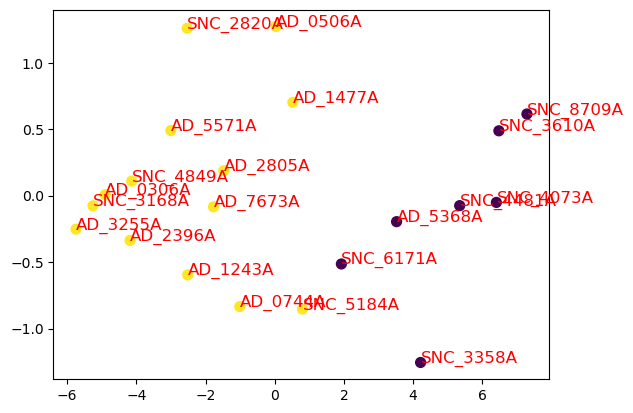

In [94]:
# standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA. Let's say we want to reduce the dimensions to 2
pca = PCA(n_components=4)

# Fit and transform the data
df_pca = pca.fit_transform(X)

embedding = df_pca
# # Apply UMAP
# reducer = umap.UMAP(random_state=42)
# embedding = reducer.fit_transform(X)

# Define KMeans object
kmeans = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=3000, 
    tol=1e-04, random_state=0
)

# Compute k-means clustering on the UMAP reduced data
y_km = kmeans.fit_predict(embedding)

labels = [str(list(Xo.group)[n])+"_"+str(list(Xo.caseid)[n]) for n in range(len(Xo.group))]

# Create a scatter plot for each cluster
n=0

# Visualizing the clusters
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_km, s=50, cmap='viridis')

# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')

# Display the plot
plt.show()



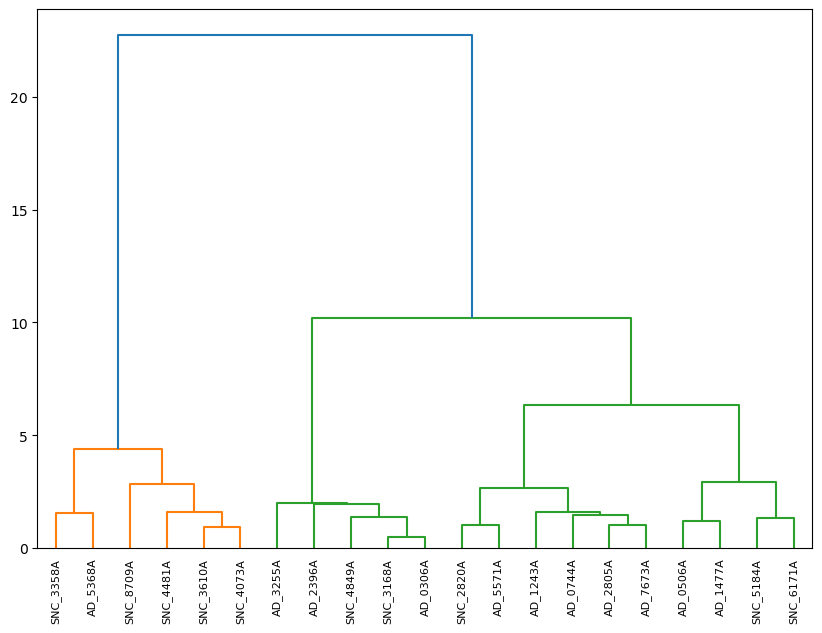

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using the 'ward' method
Z = linkage(embedding, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=labels, leaf_rotation=90, leaf_font_size=8)

# Show the plot
plt.show()

### Birch
Balanced Iterative Reducing and Clustering using Hierarchies

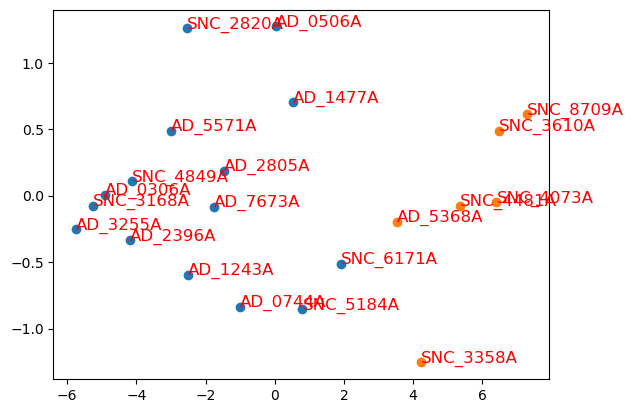

In [96]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(embedding)
# assign a cluster to each example
yhat = model.predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
  row_ix = np.where(yhat == cluster)
 # create scatter of these samples
  plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')

# show the plot
plt.show()

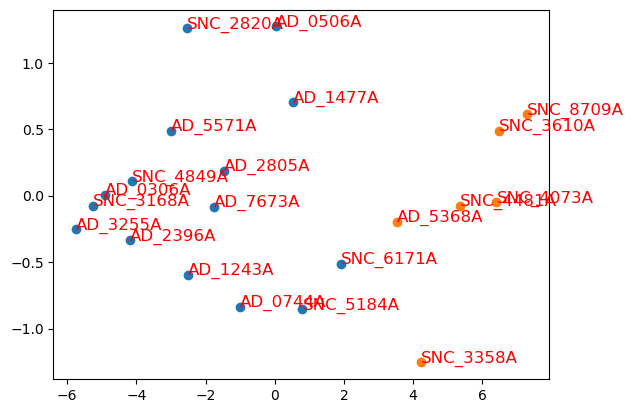

In [97]:
from sklearn.cluster import SpectralClustering
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
 # create scatter of these samples
    plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')

# show the plot
plt.show()

### Gaussian Mixture Model

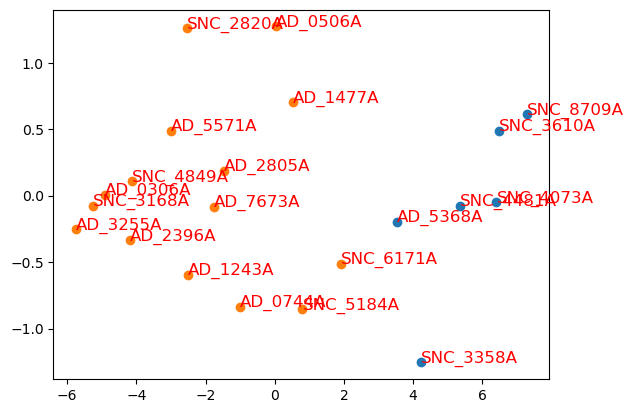

In [98]:
from sklearn.mixture import GaussianMixture

# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(embedding)
# assign a cluster to each example
yhat = model.predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
 # create scatter of these samples
    plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')

# show the plot
plt.show()

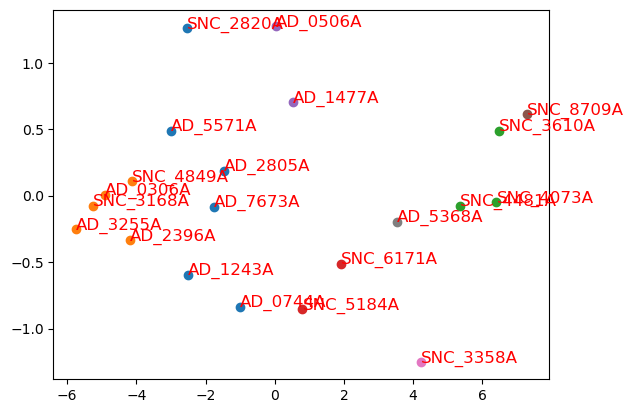

In [99]:
from sklearn.cluster import MeanShift

# define the model
model = MeanShift(bandwidth=1.5)
# fit model and predict clusters
yhat = model.fit_predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
   row_ix = np.where(yhat == cluster)
 # create scatter of these samples
   plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')
# show the plot
plt.show()

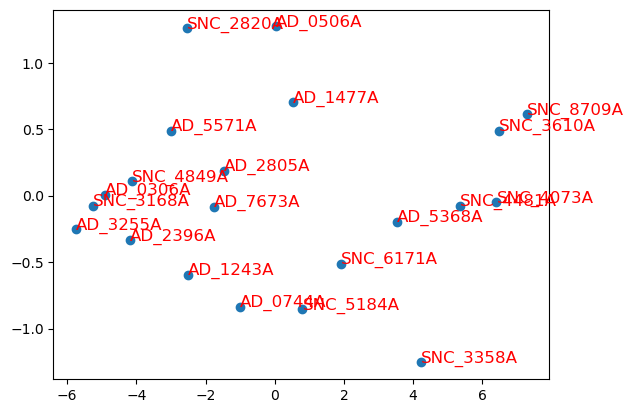

In [100]:
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=2, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(embedding)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
   row_ix = np.where(yhat == cluster)
 # create scatter of these samples
   plt.scatter(embedding[row_ix, 0], embedding[row_ix, 1])
# Labeling the data points
for i, point in enumerate(embedding):
    plt.text(point[0], point[1], str(labels[i]), fontsize=12, color='red')
# show the plot
plt.show()

In [101]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

loo = LeaveOneOut()
loo.get_n_splits(X)

#generate a list with 11 zeros and 10 ones
y = np.zeros(21)
y[11:] = 1
print(y)

for train_index, test_index in loo.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LogisticRegression()  # Using Logistic Regression as an example
    model.fit(X_train, y_train)   # Fit model on training data
    
    y_pred = model.predict(X_test)  # Make predictions on test data
    print("Actual:", y_test)
    print("Predicted:", y_pred)
    print("Correct:", y_test == y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Train: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] Validation: [0]
Actual: [0.]
Predicted: [1.]
Correct: [False]
Train: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] Validation: [1]
Actual: [0.]
Predicted: [1.]
Correct: [False]
Train: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] Validation: [2]
Actual: [0.]
Predicted: [0.]
Correct: [ True]
Train: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] Validation: [3]
Actual: [0.]
Predicted: [0.]
Correct: [ True]
Train: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] Validation: [4]
Actual: [0.]
Predicted: [0.]
Correct: [ True]
Train: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] Validation: [5]
Actual: [0.]
Predicted: [0.]
Correct: [ True]
Train: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20] Validation: [6]
Actual: [0.]
Predicted: [1.]
Correct: [False]
Train: [ 0  1  2  